# Setup

In [1]:
import pickle
import tensorflow as tf

from util import *
from biomedical_qa.models import model_from_config
from biomedical_qa.sampling.squad import SQuADSampler

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("../model_checkpoints/squad_baseline_dropout05/config.pickle", 'rb') as f:
    model_config = pickle.load(f)
model = model_from_config(model_config)

In [3]:
rev_vocab = [""] * len(model.embedder.vocab)
for w, i in model.embedder.vocab.items():
    rev_vocab[i] = w

In [4]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
model.model_saver.restore(sess, "../model_checkpoints/squad_baseline_dropout05/model.ckpt-20000")
model.set_eval(sess)
sampler = SQuADSampler("../data/BioASQ_squad", ["dev.json"], 1, vocab=model.embedder.vocab)

# Run Model

In [25]:
b = sampler.get_batch()

start_p, end_p, start_scores, end_scores = model.run(
    sess, [model.predicted_answer_starts, 
           model.predicted_answer_ends,
           model.start_scores,
           model.end_scores], b)

In [26]:
print_question(b, rev_vocab)
print_context(b, rev_vocab)
print_answers(b, rev_vocab)
print_predicted(b, start_p[0], end_p[0], rev_vocab)

Question:
against which organisms has reverse vaccinology been used ?

Context:
the potential of this new approach is illustrated by the use of reverse vaccinology for the development of a vaccine against serogroup b meningococcus the neisseria meningitidis serogroup b project , the first example of reverse vaccinology reverse vaccinology and vaccines for serogroup b neisseria meningitidis this process , first applied to serogroup b neisseria meningitidis , has been termed as reverse vaccinology a reverse vaccinology approach to swine dysentery vaccine development swine dysentery ( sd ) is a mucohaemorrhagic colitis of pigs resulting from infection of the large intestine with the anaerobic intestinal spirochaete brachyspira hyodysenteriae reverse vaccinology approach identify an echinococcus granulosus tegumental membrane protein enolase as vaccine candidate reverse vaccinology process identified e . granulosus tegumental membrane protein enolase as vaccine candidate the application of

# Pointer Visualization

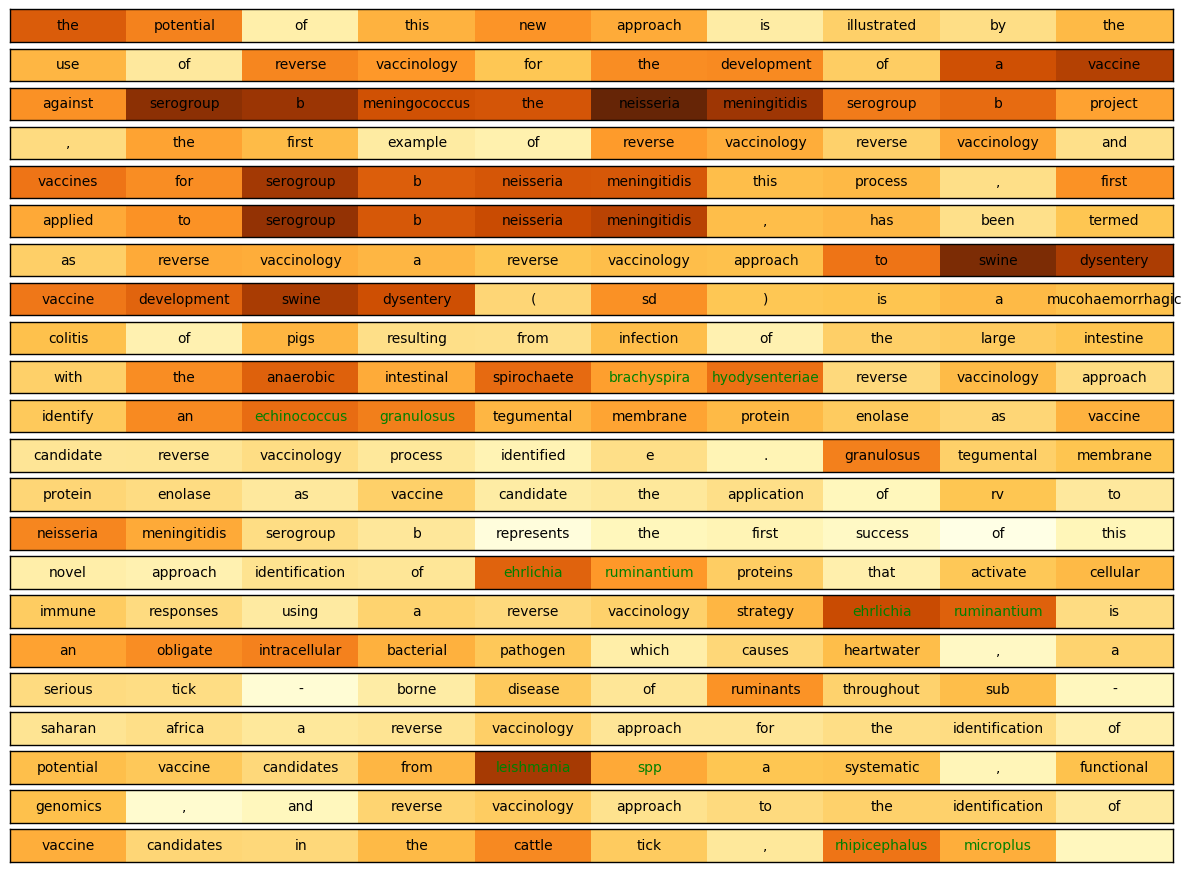

In [27]:
tokens = [rev_vocab[w] for w in b[0].context]
correct_tokens = find_correct_tokens(b)

text_heatmap(tokens, start_scores[-1], correct_tokens)

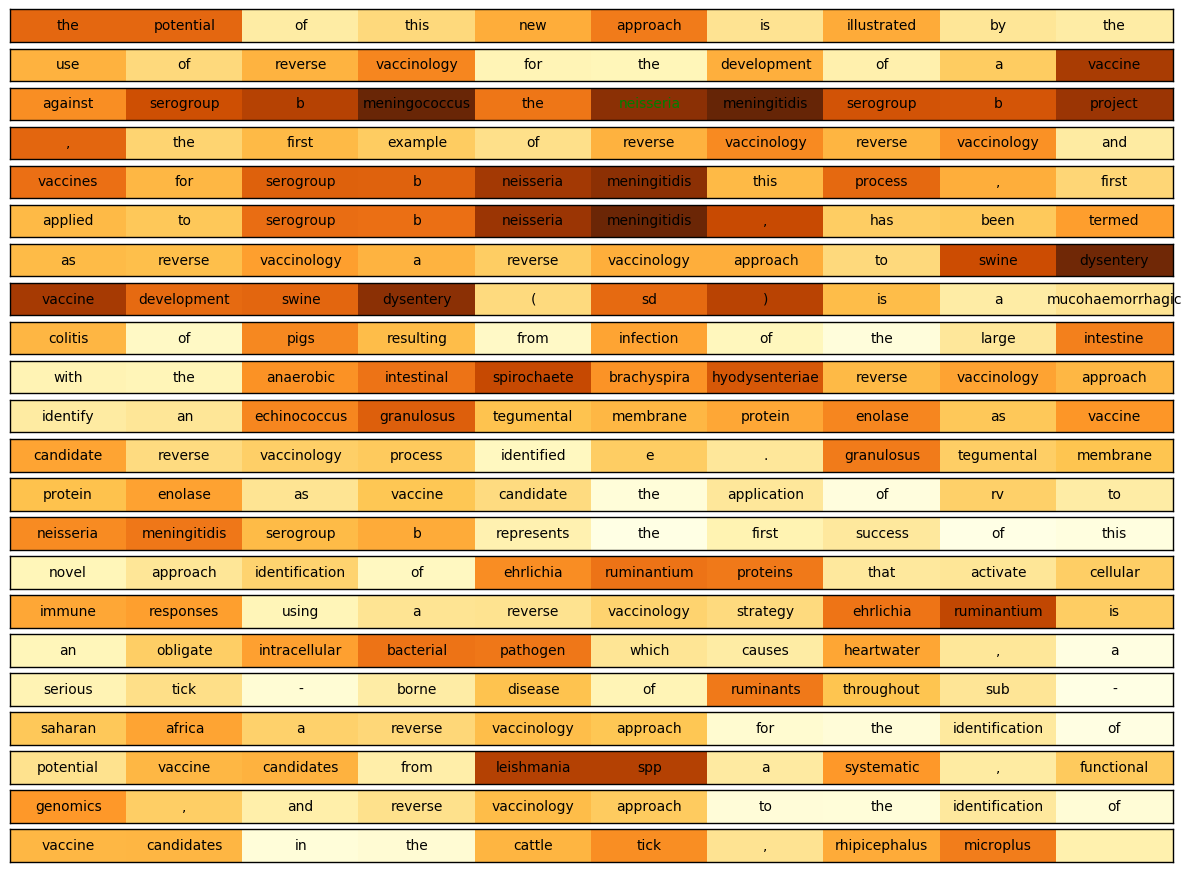

In [28]:
tokens = [rev_vocab[w] for w in b[0].context]
start_token_mask = np.zeros(len(tokens), dtype=np.bool)
start_token_mask[start_p[0]] = True

text_heatmap(tokens, end_scores[-1][[0], :], start_token_mask)